In [130]:
%pip install kaggle
%pip install -U scikit-learn

You should consider upgrading via the '/home/artur/PycharmProjects/Wine/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/artur/PycharmProjects/Wine/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Assignment 1: Classification
## Wine-quality Dataset

184.702 Machine Learning (VU 3,0) 2022S

### Group37

**Members:** <br> Sogomonyan Artur (Student ID: 12143554) <br> van Ravenstein Aebe Jari (Student ID: 12128314)

# 1. Setup





In [194]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 2. Data Loading

In [152]:
data = pd.read_csv('winequality-red.csv', sep=";")
X = pd.read_csv('winequality-red.csv', sep=";", usecols=list(range(1,11)))
y = pd.read_csv('winequality-red.csv', sep=";", usecols=[11]).values.reshape(len(X),)

# 3. Overview of the Data

Input variables
(based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol Output variable (based on sensory data)
12 - quality (score between 0 and 10)

In [153]:
X

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [154]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [155]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [156]:
data.isna().any().any()

False

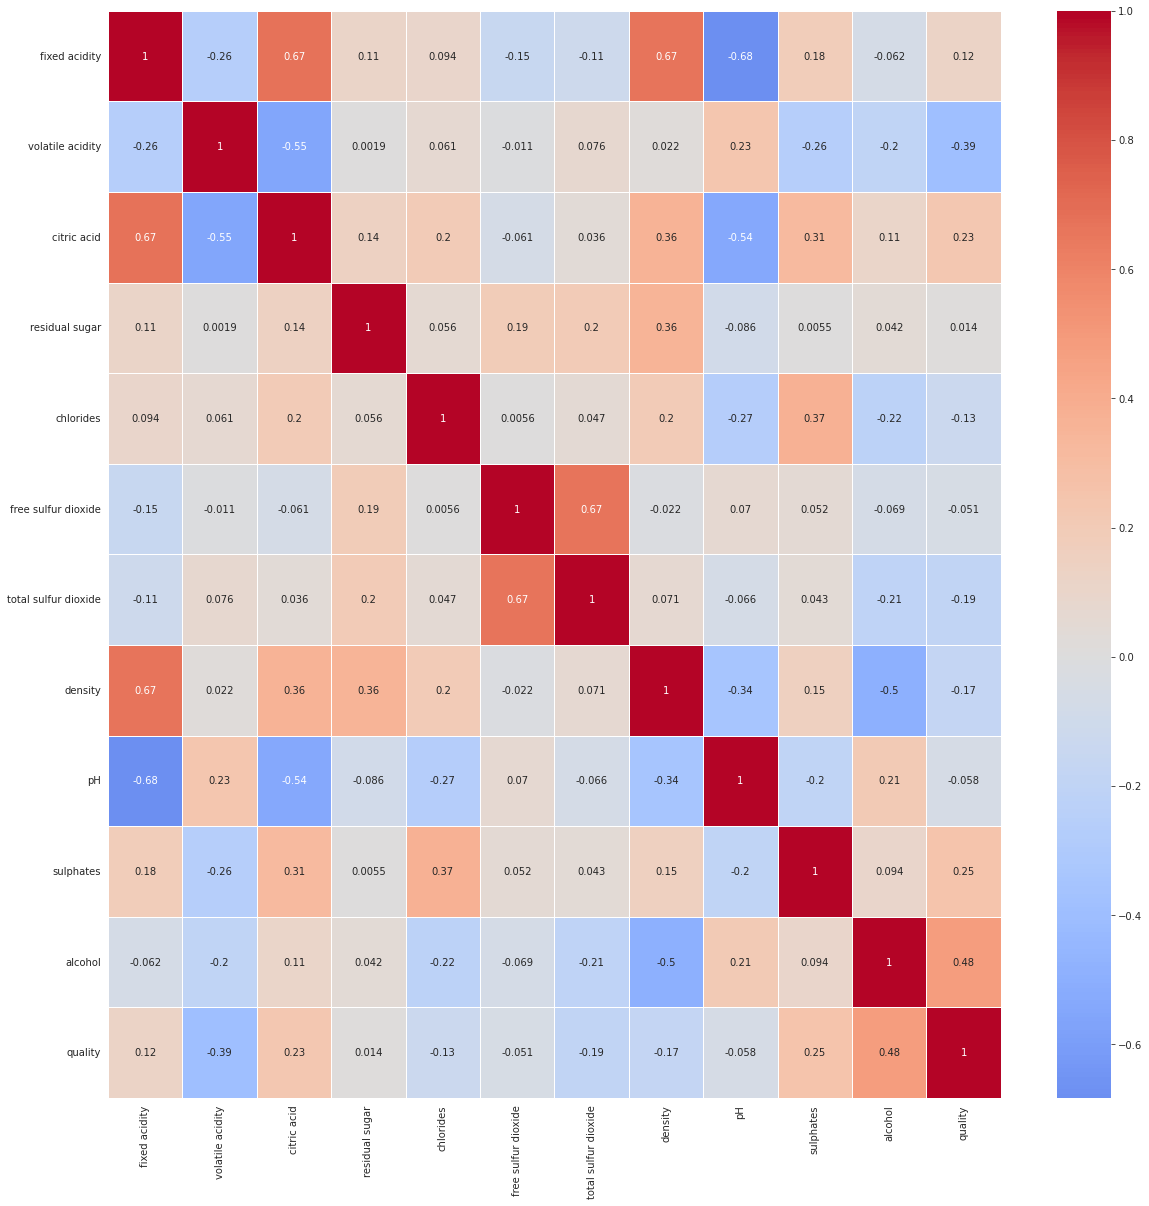

In [157]:
data.corr()['quality']
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidth=1,center=0,cmap='coolwarm')
plt.show()

/home/artur/PycharmProjects/Wine/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

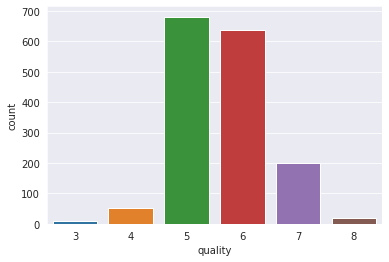

In [195]:
_ = sns.countplot(data['quality'] ,label="Class")
data['quality'].value_counts()

In [189]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 4. Preprocesing

Splitting Train/Test

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [160]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train.values)
X_test_norm = sc.transform(X_test.values)

In [196]:
sc1 = MinMaxScaler()
X_train_mm = sc1.fit_transform(X_train.values)
X_test_mm = sc1.transform(X_test.values)

In [197]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_smote_sc = scaler.fit_transform(X_smote)
X_test_sc = scaler.transform(X_test)

# 5. Evaluation Metrics
## Accuracy
Mostly we are using accuracy_score and cross validation ass a supporting value

In [162]:
def train_evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(predictions,y_test)
    f1  = metrics.f1_score(predictions,y_test, average='micro')
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("F1 Score : "  "{0:.3}\n".format(f1))

# 6. Models
## 6.1. Logistic Regression

In [193]:
lr_model = LogisticRegression(solver='saga', max_iter=10000, random_state=22)
# lr_model = LogisticRegression(random_state=22)
# lr_model = LogisticRegression(solver='liblinear', max_iter=10000)
# lr_model = LogisticRegression(solver='newton-cg', max_iter=10000)
# train_evaluate_model(lr_model, X_train_mm, y_train, X_test_mm, y_test)

folds = KFold(n_splits=5, shuffle=True, random_state=45)
score = cross_val_score(estimator=lr_model, X=X_smote, y=y_smote, scoring='accuracy', cv=folds, n_jobs=-1)
train_evaluate_model(lr_model, X_train_norm, y_train, X_test_norm, y_test)
train_evaluate_model(lr_model, X_train_mm, y_train, X_test_mm, y_test)

Accuracy : 57.386%
F1 Score : 0.574



## 6.2. Random Forest Classifier
### GridSearchCV to find better params

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 500, stop = 1500, num = 3)],
               'max_depth': max_depth,
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2]}
model = RandomForestClassifier(random_state=0)
model = GridSearchCV(model, param_grid, verbose=2)

# model.fit(X_train, y_train)
# print(model.cv_results_)

In [237]:
rf_model = RandomForestClassifier(random_state=22, max_depth=60, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
# # rf_model = RandomForestClassifier(random_state=0, max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
# # rf_model = RandomForestClassifier(random_state=22, max_features= 4, max_depth= 12)
folds = KFold(n_splits=5, shuffle=True, random_state=45)
# score = cross_val_score(estimator=rf_model, X=X_smote, y=y_smote, scoring='accuracy', cv=folds, n_jobs=-1)
score = cross_val_score(estimator=rf_model, X=X_train_mm, y=y_train, scoring='accuracy', cv=folds, n_jobs=-1)
# # train_evaluate_model(rf_model, X_train_norm, y_train, X_test, y_test)
# train_evaluate_model(rf_model, X_train_norm, y_train, X_test_norm, y_test)
train_evaluate_model(rf_model, X_train_mm, y_train, X_test_mm, y_test)
score.mean()

Accuracy : 88.258%
F1 Score : 0.883



0.9075374918495978

## 6.3. K-Nearest Neighbor

In [190]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_folds=5, shuffle=True, random_state=42)
 
kMeans = list()
scores = list()
#kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

for k in range(1, 51):
    kn = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
    # kn.fit(X_train_norm, y_train)
    kn.fit(X_train_mm, y_train)
    # predictions = kn.predict(X_test_norm)
    predictions = kn.predict(X_test_mm)
    accuracy = metrics.accuracy_score(predictions,y_test)
    f1  = metrics.f1_score(predictions,y_test, average='micro')
    # array = cross_val_score(estimator=kn, X=X_train_norm, y=y_train, cv=kf, scoring='accuracy')
    array = cross_val_score(estimator=kn, X=X_train_mm, y=y_train, cv=kf, scoring='accuracy')
    m = array.mean()
    kMeans.append(m)
    scores.append(accuracy)
 
m = max(kMeans)
accuracy_score = max(scores)

answ = np.round(m,decimals=2)

print(answ)
print(accuracy_score)

0.68
0.6553030303030303


# 7. Classification issue

In [224]:
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]
# Separate feature variables and target variable
X_bin = data.drop(['quality','goodquality'], axis = 1)
y_bin = data['goodquality']

In [225]:
X_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [226]:
y_bin

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

/home/artur/PycharmProjects/Wine/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1382
1     217
Name: goodquality, dtype: int64

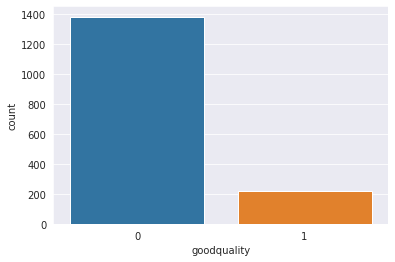

In [227]:
_ = sns.countplot(data['goodquality'] ,label="Class")
data['goodquality'].value_counts()

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size = 0.33, random_state = 42)

In [229]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train.values)
X_test_norm = sc.transform(X_test.values)

In [230]:
sc1 = MinMaxScaler()
X_train_mm = sc1.fit_transform(X_train.values)
X_test_mm = sc1.transform(X_test.values)

In [231]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#kf = KFold(n_folds=5, shuffle=True, random_state=42)

kMeans = list()
scores = list()
#kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

for k in range(1, 51):
    kn = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
    kn.fit(X_train_norm, y_train)
    # kn.fit(X_train_mm, y_train)
    predictions = kn.predict(X_test_norm)
    # predictions = kn.predict(X_test_mm)
    accuracy = metrics.accuracy_score(predictions,y_test)
    f1  = metrics.f1_score(predictions,y_test, average='micro')
    # array = cross_val_score(estimator=kn, X=X_train_norm, y=y_train, cv=kf, scoring='accuracy')
    array = cross_val_score(estimator=kn, X=X_train_mm, y=y_train, cv=kf, scoring='accuracy')
    m = array.mean()
    kMeans.append(m)
    scores.append(accuracy)

m = max(kMeans)
accuracy_score = max(scores)

answ = np.round(m,decimals=2)

print(answ)
print(accuracy_score)

0.91
0.8901515151515151


In [232]:
# lr_model = LogisticRegression(max_iter=10000, random_state=22)
lr_model = LogisticRegression()
# lr_model = LogisticRegression(solver='liblinear', max_iter=10000)
# lr_model = LogisticRegression(solver='newton-cg', max_iter=10000)
# train_evaluate_model(lr_model, X_train_mm, y_train, X_test_mm, y_test)

folds = KFold(n_splits=5, shuffle=True, random_state=45)
score = cross_val_score(estimator=lr_model, X=X_smote, y=y_smote, scoring='accuracy', cv=folds, n_jobs=-1)
train_evaluate_model(lr_model, X_train_norm, y_train, X_test_norm, y_test)
train_evaluate_model(lr_model, X_train_mm, y_train, X_test_mm, y_test)

Accuracy : 86.932%
F1 Score : 0.869

Accuracy : 86.364%
F1 Score : 0.864



In [233]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
train_evaluate_model(dt_model, X_train_norm, y_train, X_test_norm, y_test)
train_evaluate_model(dt_model, X_train_mm, y_train, X_test_mm, y_test)

Accuracy : 82.765%
F1 Score : 0.828

Accuracy : 82.955%
F1 Score : 0.83



In [234]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
train_evaluate_model(xgb_model, X_train_norm, y_train, X_test_norm, y_test)
train_evaluate_model(xgb_model, X_train_mm, y_train, X_test_mm, y_test)

Accuracy : 89.015%
F1 Score : 0.89

Accuracy : 89.015%
F1 Score : 0.89

